<a href="https://colab.research.google.com/github/andysingal/Complete-Python-3-Bootcamp/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
#import cv2
import os
import pathlib
#libraries for plotting the model
import pydot
import pydotplus
from pydotplus import graphviz
from tensorflow.keras.utils import plot_model


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

pd.options.display.max_rows=20

# Turn off future warnings 
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) 



# New Section

# New Section

In [4]:
#print("numpy :", np.__version__)
print("pandas :", pd.__version__)
print("tensorflow :", tf.__version__)

pandas : 1.1.5
tensorflow : 2.4.1


In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


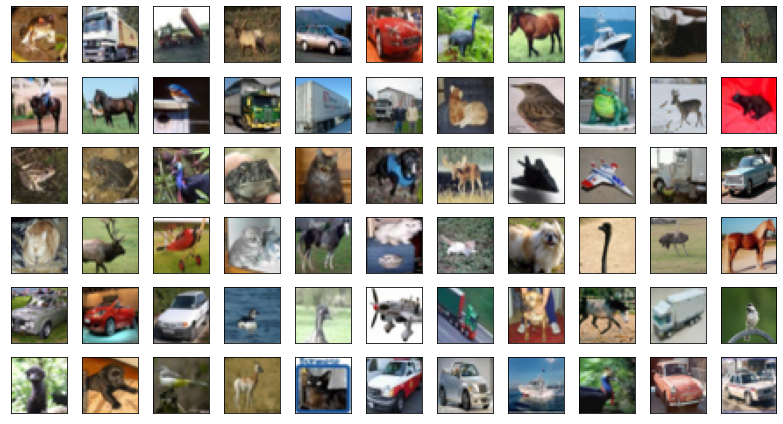

In [18]:
# Now lets take a look at some of our triaining images!

plt.figure(figsize=(11,6))
for i in range(66): 
    plt.subplot(6,11,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]) 
    plt.yticks([])
    
plt.tight_layout()

In [12]:
#normalize

In [13]:
x_train = x_train/255
x_test = x_test/255

In [26]:
x_train.shape

(50000, 32, 32, 3)

ONE HOT ENCODING


In [15]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [16]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [34]:
y_cat_train.shape

(50000, 10)

BUILDING A MODEL

In [35]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER 
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

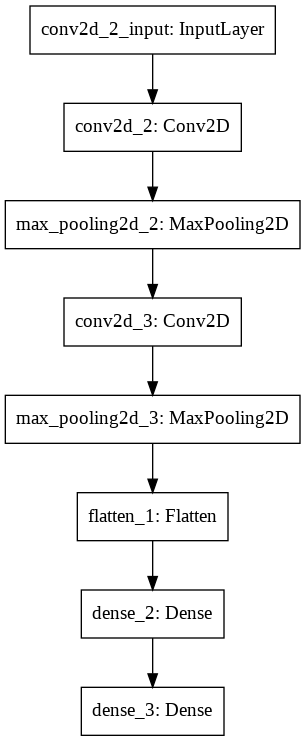

In [37]:
tf.keras.utils.plot_model(
    model, to_file='model.png'
)

TRAINING MODEL¶

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [40]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7112 - accuracy: 0.3812 - val_loss: 1.2589 - val_accuracy: 0.5577
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1802 - accuracy: 0.5846 - val_loss: 1.1011 - val_accuracy: 0.6140
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0110 - accuracy: 0.6510 - val_loss: 1.0543 - val_accuracy: 0.6365
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8973 - accuracy: 0.6906 - val_loss: 1.2056 - val_accuracy: 0.6039
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8062 - accuracy: 0.7218 - val_loss: 0.9918 - val_accuracy: 0.6738
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7345 - accuracy: 0.7476 - val_loss: 0.9874 - val_accuracy: 0.6770
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6905 - accuracy: 0.7677 - val_loss: 1.0015 - val_ac

MODEL EVALUATION

In [41]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.497341,0.46428,1.258888,0.5577
1,1.148365,0.59722,1.101133,0.6140
2,0.997543,0.65536,1.054313,0.6365
3,0.895495,0.69144,1.205618,0.6039
4,0.820740,0.71828,0.991834,0.6738
5,0.758167,0.74076,0.987429,0.6770
6,0.713059,0.75848,1.001455,0.6798
7,0.669553,0.77220,1.057628,0.6875


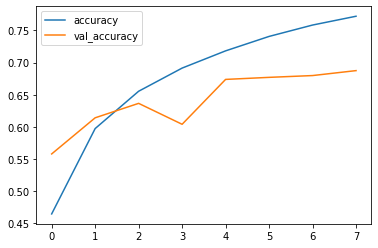

In [42]:
losses[['accuracy','val_accuracy']].plot()

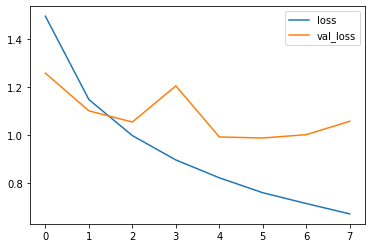

In [43]:
losses[['loss','val_loss']].plot()

In [44]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.057627558708191, 0.6875]


In [45]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1000
           1       0.84      0.81      0.82      1000
           2       0.49      0.69      0.57      1000
           3       0.53      0.44      0.48      1000
           4       0.70      0.64      0.67      1000
           5       0.59      0.59      0.59      1000
           6       0.80      0.75      0.77      1000
           7       0.81      0.69      0.75      1000
           8       0.64      0.90      0.75      1000
           9       0.84      0.75      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [49]:
confusion_matrix(y_test,predictions)

array([[618,  26,  89,  10,   8,   8,  13,  10, 192,  26],
       [ 19, 808,  24,   6,   3,   8,  13,   2,  63,  54],
       [ 38,   6, 690,  57,  63,  46,  38,  22,  34,   6],
       [ 20,   5, 137, 442,  48, 199,  55,  27,  49,  18],
       [ 15,   5, 121,  71, 635,  30,  40,  49,  29,   5],
       [ 13,   3, 124, 144,  42, 594,  16,  35,  22,   7],
       [  7,   4, 101,  50,  38,  24, 746,   7,  18,   5],
       [ 22,   3,  69,  41,  60,  83,   1, 693,  15,  13],
       [ 17,  19,  23,  11,   5,   7,   5,   1, 901,  11],
       [ 21,  80,  27,   9,   3,   9,   9,  11,  83, 748]])

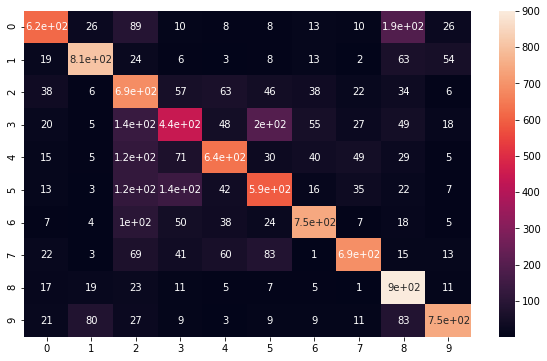

In [50]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

PREDICTING IMAGES

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


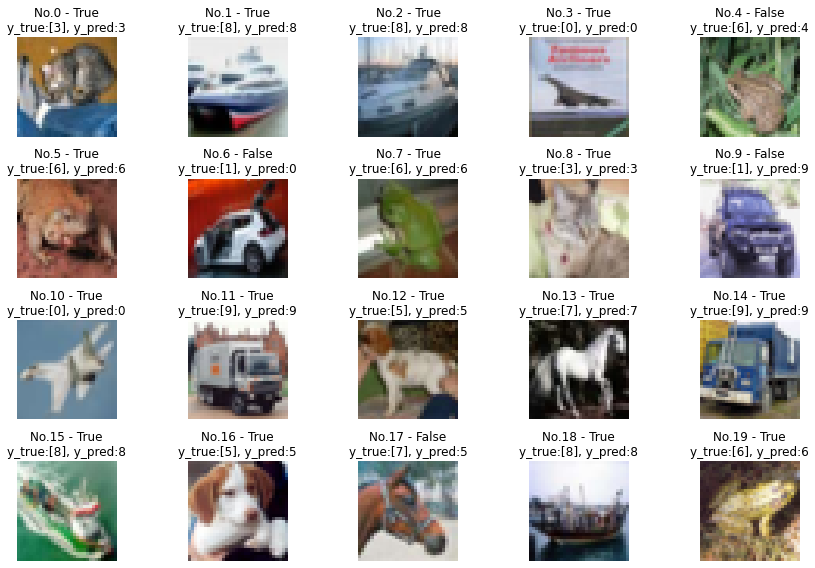

In [48]:
fig = plt.figure(figsize=(12, 8))

ROW = 4
COLUMN = 5

for i in range(ROW * COLUMN):
    y_true = y_test[i]
    y_pred = model.predict_classes(x_test[i].reshape(1,32,32,3))[0]
    
    if y_true == y_pred:
        result = "True" # Correct answer from the model
    else:
        result = "False" # Incorrect answer from the model
    
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("No.{} - {}\ny_true:{}, y_pred:{}".format(i, result, y_true, y_pred))
    plt.axis("off")

fig.tight_layout()
fig.show()
